# Машинное обучение, DS-поток, осень 2022
## Задание 3.6


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание**

* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 30 баллов
* Задача 3 &mdash; 70 баллов
* Задача 4 &mdash; 30 баллов

## Задача 1

Запишите оценку сложности построения одного решающего дерева в зависимости от размера обучающей выборки $n$, числа признаков $d$, максимальной глубины дерева $D$. В качестве правил используются пороговые функции $I\{x_j>t\}$. При выборе правил в каждой вершине перебираются все признаки, а в качестве порогов рассматриваются величины $t$, равные значениям этого признака на объектах, попавших в текущую вершину. Для простоты, считайте сложность вычисления критерия информативности по уже построенному множеству объектов константной.

Рассмотри произвольную вершину, до которой дошел наш алгоритм. Пусть в данной вершине находится $k$ объектов, тогда
мы рассматриваем $k d$ разбиений (перебираем значения всех признаков для каждого из объектов). Далее для каждого разбиения делим наши объекты в соответствии с признаком и пороговым значением за линию, то есть за $O(k)$. Для каждого разбиения мы считаем информативность за константу (так сказано в условии). Тогда одну вершину мы обрабатываем за $O(k^2 d)$. На каждом уровне дерева у нас не более n объектов, то есть на каждый уровень мы тратим $O(n^2 d)$ времени. Тогда учитывая, что глубина дерева $D$, то общее время построения дерева $O(n^2 dD)$.

## Задача 2

Пусть обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$ такова, что
* объекты $X_1, ..., X_n$ одномерны и имеют распределение $\mathcal{N}(0, \sigma^2)$;
* отклик получается по правилу $Y_i = X_i^2 + \varepsilon_i$, где $\varepsilon_i$ независимы, имеют нулевое среднее и не зависят от $X_i$. 

Пусть также для объекта $X$ отклик $Y$ получен по аналогичному правилу, причем $X$ и $Y$ не зависят от обучающей выборки.

Для МНК-модели $\widehat{y}(x) = \widehat{\theta} x$ выпишите подробное bias-variance разложение со всеми тремя компонентами: смещение, разброс, шум. Компоненту, отвечающую за разброс, разрешается не доводить до конца. Если в выражении присутствует дисперсия $\varepsilon_i$, то так и пишите: $D(\varepsilon_i)$.

## Задача 3

В этой задаче вам предлагается исследовать зависимость качества предсказаний модели случайного леса в зависимости от различных гиперпараметров на примере задаче регрессии. Будем использовать класс `RandomForestRegressor` библиотеки `sklearn`.

В качестве данных возьмём датасет `california_housing` из библиотеки `sklearn` о стоимости недвижимости в различных округах Калифорнии. Этот датасет состоит из 20640 записей и содержит следующие признаки для каждого округа: `MedInc`, `HouseAge`, `AveRooms`, `AveBedrms`, `Population`, `AveOccup`, `Latitude`, `Longitude`. `HouseAge` и `Population` &mdash; целочисленные признаки. Остальные признаки &mdash; вещественные.

*Совет.* При отладке кода используйте небольшую часть данных. Финальные вычисления проведите на полных данных. Для оценки времени работы используйте `tqdm` в циклах.

**Исправил последний график, вывод про переобучение и вывод про источники случайности, перед исправлениями говорил, где исправил.**

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import seaborn as sns
sns.set(context='poster')

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

Разбейте данные на обучающую выборку и на валидацию, выделив на валидацию 25% данных.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25, shuffle=True)

Посмотрите, как изменяется качество леса в зависимости от выбранных параметров. Для этого постройте графики зависимости MSE на тестовой выборке от количества деревьев (от 1 до 100) и от максимальной глубины дерева (от 3 до 25). Когда варьируете один из параметров, в качестве другого берите значение по умолчанию.

Попробуйте получить зависимость от количества деревьев, обучив лишь один случайный лес. В этом вам поможет аттрибут `_estimators` у обученной модели.

In [64]:
max_depth = 20 # зафиксируем максимальную глубину
n_estimators = 100
model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20)

In [65]:
mse_values = []
for i in range(1, n_estimators + 1):
    predictions = list(map(lambda x: x.predict(X_test), model.estimators_[:i]))
    predictions = np.mean(predictions, axis=0)
    mse_values.append(mean_squared_error(predictions, y_test))

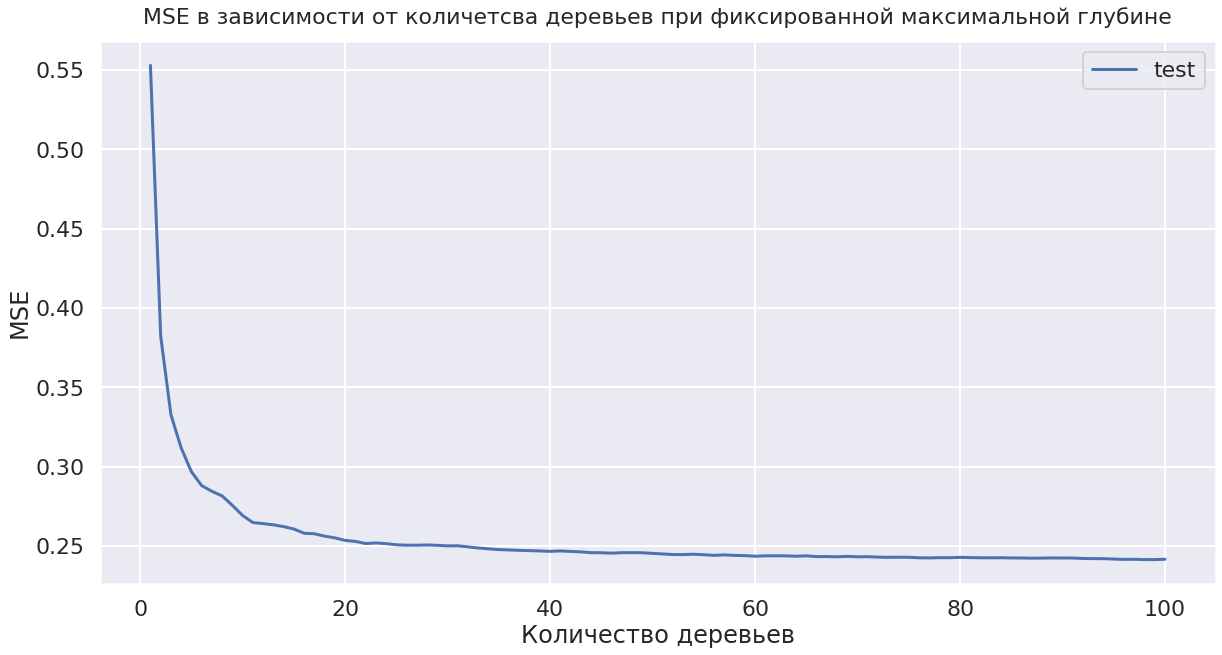

In [66]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(n_estimators) + 1, mse_values, label='test')
plt.legend()
plt.xlabel('Количество деревьев')
plt.ylabel('MSE')
plt.title('MSE в зависимости от количетсва деревьев при фиксированной максимальной глубине', fontsize=22, y=1.02);

In [67]:
n_estimators = 50 # зафиксируем количество деревьев
max_depth = 25
model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, n_estimators=50)

In [68]:
mse_values = []
for i in range(3, max_depth + 1):
    predictions = list(map(lambda x: x.predict(X_test), model.estimators_[:i]))
    predictions = np.mean(predictions, axis=0)
    mse_values.append(mean_squared_error(predictions, y_test))

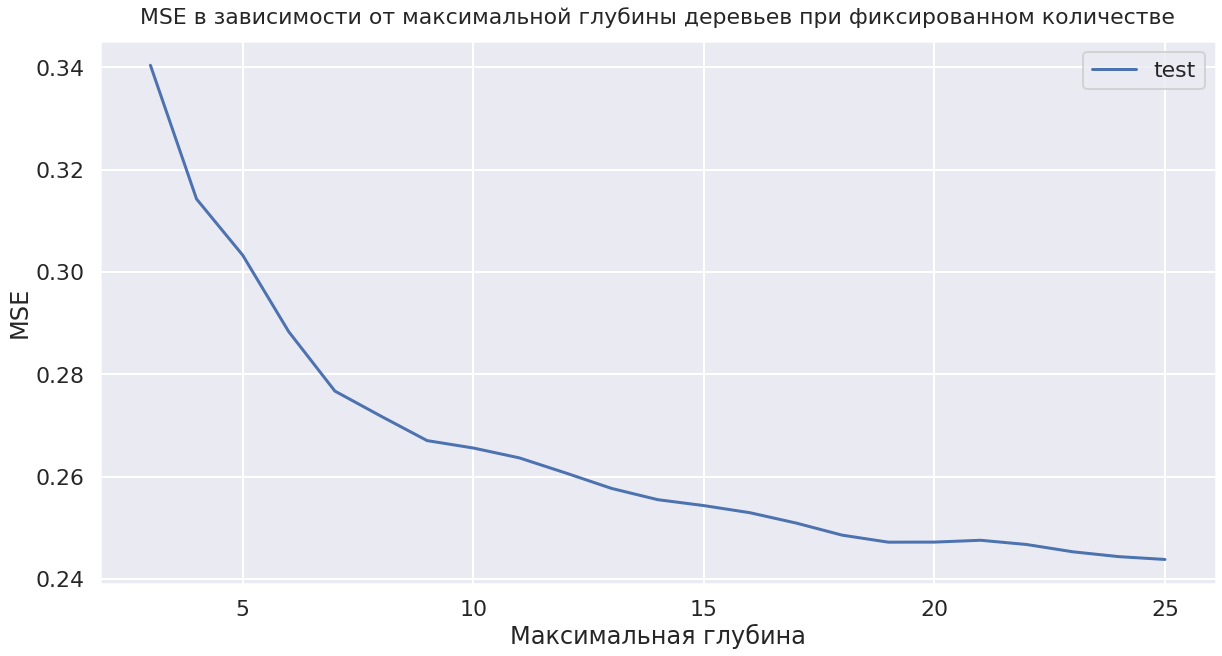

In [69]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(3, max_depth + 1), mse_values, label='test')
plt.legend()
plt.xlabel('Максимальная глубина')
plt.ylabel('MSE')
plt.title('MSE в зависимости от максимальной глубины деревьев при фиксированном количестве', fontsize=22, y=1.02);

Основываясь на полученных графиках, ответьте на следующие вопросы.

1. Какие закономерности можно увидеть на построенных графиках? Почему графики получились такими?

2. Как изменяется качество предсказаний с увеличением исследуемых параметров, когда эти параметры уже достаточно большие.

3. В предыдущем задании вы на практике убедились, что решающее дерево начинает переобучаться при достаточно больших значениях максимальной глубины. Справедливо ли это утверждение для случайного леса? Поясните свой ответ, опираясь на своё знание статистики.

**Ответ:** На первом графике видно, что при количетсве деревьев равном 30 у нас уже получается неплохое значение MSE, в том смысле, что затем она убывает очень медленно. До 20 же наоборот - убывание очень быстрое. На втором графике же MSE также убывает, но не так быстро. В целом можно сказать, что при максимальной глубине дерева, равной 20 получается хорошая ошибка, в плане того,что затем она почти не уменьшается, но при этом в окрестности 20 MSE немного увеличивается. То есть можно сказать, что с увеличением параметров ошибка уменьшается, но для обоих параметров наступает момент, когда ошибка начинает убывать довольно медленно. 

**Добавил здесь про переобучение**

В случае если данные сильно шумные как мы показали на семинаре может быть переобучение при слишкой большой глубине деревьев. В остальных же случаях при достаточно больших значениях максимальной глубины переобучения случайного леса не будет. Если брать неглубокие деревья, то они будут достаточно похожи друг на друга и тогда вообще непонятно зачем нам случайнй лес. Если же деревья будут глубокие, то при их усреднении случайный лес не будет переобученным, тк в деревьях были разные подвыборки и мы не будем как то подстраиваться под значения всей выборки. Грубо говоря, для неглубоких деревьев будет низкая дисперсия, но сам результат будет не совсем точным, а при глубоких дисперсия будет больше, но результат в среднем будет точнее.

Обучите случайный лес с параметрами по умолчанию и выведите MSE на тестовой выборке. Проведите эксперимент 3 раза. Почему результаты отличаются? Какие источники случайности есть при построении случайного леса и какие из них реализуются в данном случае?

In [71]:
n_estimators = 50
max_depth = 20
for i in range(3):
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train, y_train)
    print('MSE: ', mean_squared_error(model.predict(X_test), y_test))

MSE:  0.24071215011893538
MSE:  0.2411908071660027
MSE:  0.2424149278681056


**Дописал вывод**

**Ответ:** Мы не зафиксировали параметр random_state, то есть каждый раз у нас берется случайная выборка при построении деревьев в случайном лесе, из за этого и результаты отличаются, но совсем не намного. Также выделяется случайно множество признаков для поиска оптимального разбиения, но в нашем случае этого источника случайности нет, так как по умолчанию мы рассматриваем все признаки.

Было бы неплохо определиться с тем, какое количество деревьев нужно использовать и какой максимальной глубины они будут. Подберите оптимальные значения `max_depth` и `n_estimators` с помощью кросс-валидации.

Для параметра n_estimators рассмотрим значения от 45 до 65, так как из самого первого графика мы можем сказать, что при n_estimators равном 30 и более ошибка убывает очень медленно. Поэтому чтобы обучение не было очень долгим я поставил такой параметр и совсем немного потерял в качестве.

In [78]:
parameters_grid = {
    'n_estimators' : np.arange(45, 65),
    'max_depth' : np.arange(15, 26)
}

model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=25)
ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=26)

gs = GridSearchCV(
    estimator=model,
    param_grid=parameters_grid,
    scoring='neg_mean_squared_error',
    cv=ss,
    n_jobs=-1
)

gs.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=26, test_size=0.25, train_size=None),
             estimator=RandomForestRegressor(max_depth=20, n_estimators=50,
                                             random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]),
                         'n_estimators': array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64])},
             scoring='neg_mean_squared_error')

Выведите найденные оптимальные параметры.

In [79]:
gs.best_params_

{'max_depth': 21, 'n_estimators': 64}

Как я и говорил раннее ошибка убывает при увеличении количества деревьев, поэтому у нас получилось граничное значение сетки, можно конечно попробовать подбирать другое n_estimators, но поиск по сетке опять же займет очень много времени, а ошибка уменьшится совсем на чуть чуть.

Зафиксируем эти оптимальные значения параметров и в дальнейшим будем их использовать.

In [4]:
max_depth = 21
n_estimators = 64

Оценим качество предсказаний обученного решающего леса.

In [113]:
model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=25)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=21, n_estimators=64, random_state=25)

In [114]:
print('MSE: ', mean_squared_error(model.predict(X_test), y_test))

MSE:  0.2419223354968206


Исследуйте зависимость метрики `mse` от количества признаков, по которым происходит разбиение в вершине дерева. Поскольку количество признаков в датасете не очень большое (их 8), то можно перебрать все возможные варианты количества признаков, использующихся при разбиении вершин.

Не забывайте делать пояснения и выводы!

In [90]:
mse_values = []
max_features = np.arange(1, 9)
for i in max_features:
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=i, random_state=25)
    model.fit(X_train, y_train)
    mse_values.append(mean_squared_error(model.predict(X_test), y_test))

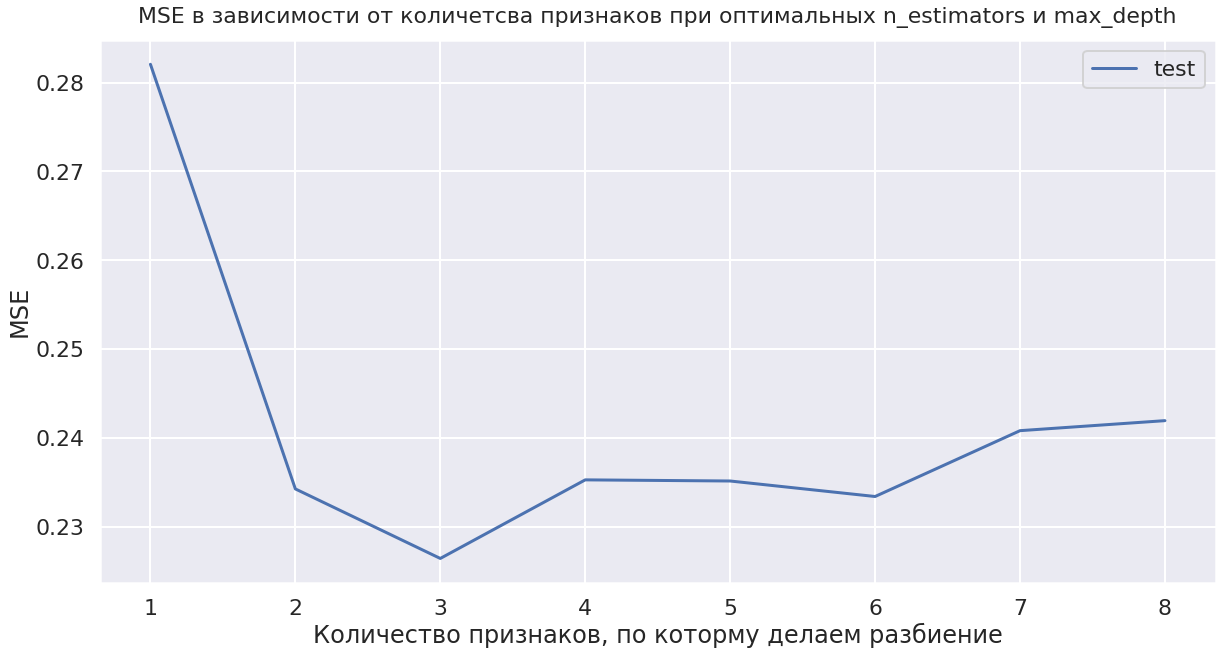

In [91]:
plt.figure(figsize=(20, 10))
plt.plot(max_features, mse_values, label='test')
plt.legend()
plt.xlabel('Количество признаков, по которму делаем разбиение')
plt.ylabel('MSE')
plt.title('MSE в зависимости от количетсва признаков при оптимальных n_estimators и max_depth', 
          fontsize=22, y=1.02);

На графике видно, что лучшее качество модели получается когда мы берем 3 признака. Затем же качество модели снова ухудшается.

Постройте график зависимости метрики mse на `test` и `train` в зависимости от числа признаков, использующихся при разбиении в каждой вершине.

In [5]:
mse_values_train_rf = []
mse_values_test_rf = []
max_features = np.arange(1, 9)
for i in max_features:
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=i, random_state=25)
    model.fit(X_train, y_train)
    mse_values_train_rf.append(mean_squared_error(model.predict(X_train), y_train))
    mse_values_test_rf.append(mean_squared_error(model.predict(X_test), y_test))

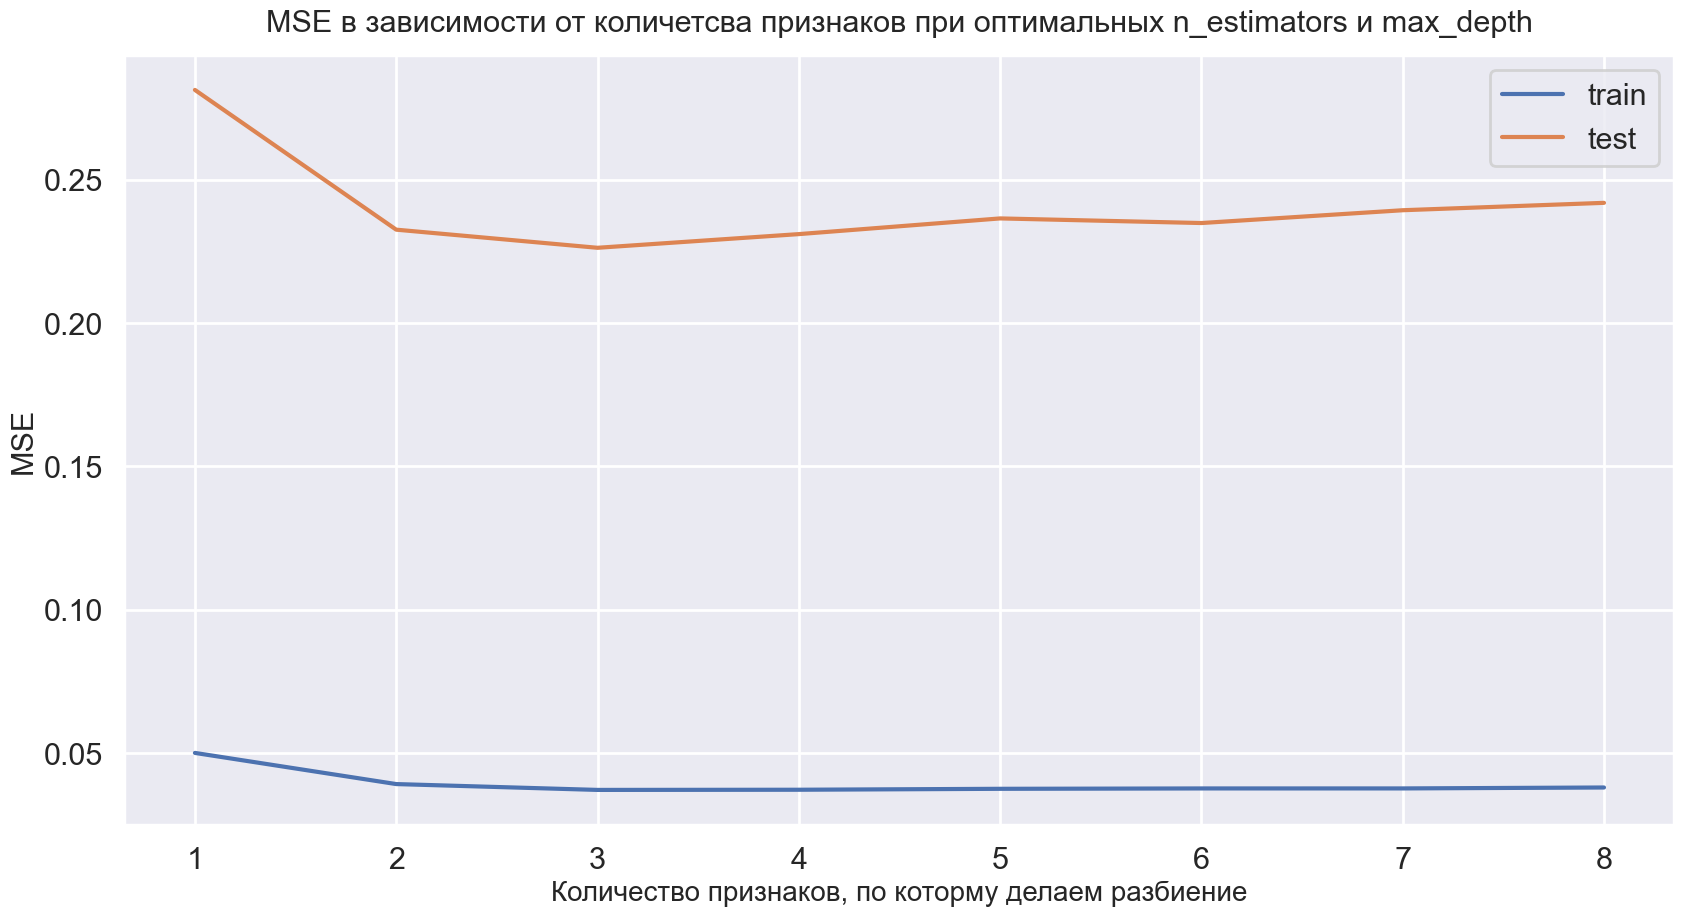

In [6]:
plt.figure(figsize=(20, 10))
plt.plot(max_features, mse_values_train_rf, label='train')
plt.plot(max_features, mse_values_test_rf, label='test')
plt.legend()
plt.xlabel('Количество признаков, по которму делаем разбиение', fontsize=20)
plt.ylabel('MSE', fontsize=22)
plt.title('MSE в зависимости от количетсва признаков при оптимальных n_estimators и max_depth', 
          fontsize=22, y=1.02);

Почему график получился таким? Как зависит разнообразие деревьев от величины `n_features`?

**Ответ:** На графике видно, что на обучающей выборке ошибка довольно стабильна и почти не колеблется, на тестовой же выборке четко видно когда достигается оптимальное значение n_features, так как ошибка не стабильна и сильно колеблется.

Проведите эксперимент, в котором выясните, как изменится качество регрессии, если набор признаков, по которым происходит разбиение в каждой вершине определяется не заново в каждой вершине, а задан заранее для всего дерева. То есть перед каждым построением дерева выбирается новый набор признаков, который будет рассматриваться при построении всех разбиений в этом дереве.

Для реализации данного эксперимента используйте класс беггинг-модели `sklearn.ensemble.BaggingRegressor`, у которого используйте следующие поля:
* `base_estimator` — базовая модель, используйте `sklearn.tree.DecisionTreeRegressor`;
* `max_features` — количество признаков для каждой базовой модели;
* `n_estimators` — количество базовых моделей.

Постройте графики `mse` на обучающей и на валидационной выборке в зависимости от числа рассматриваемых признаков в дереве.

In [8]:
mse_values_train = []
mse_values_test = []
max_features = np.arange(1, 9)
for i in max_features:
    model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_features=i, n_estimators=64, random_state=25)
    model.fit(X_train, y_train)
    mse_values_train.append(mean_squared_error(model.predict(X_train), y_train))
    mse_values_test.append(mean_squared_error(model.predict(X_test), y_test))

**Исправил график ниже**

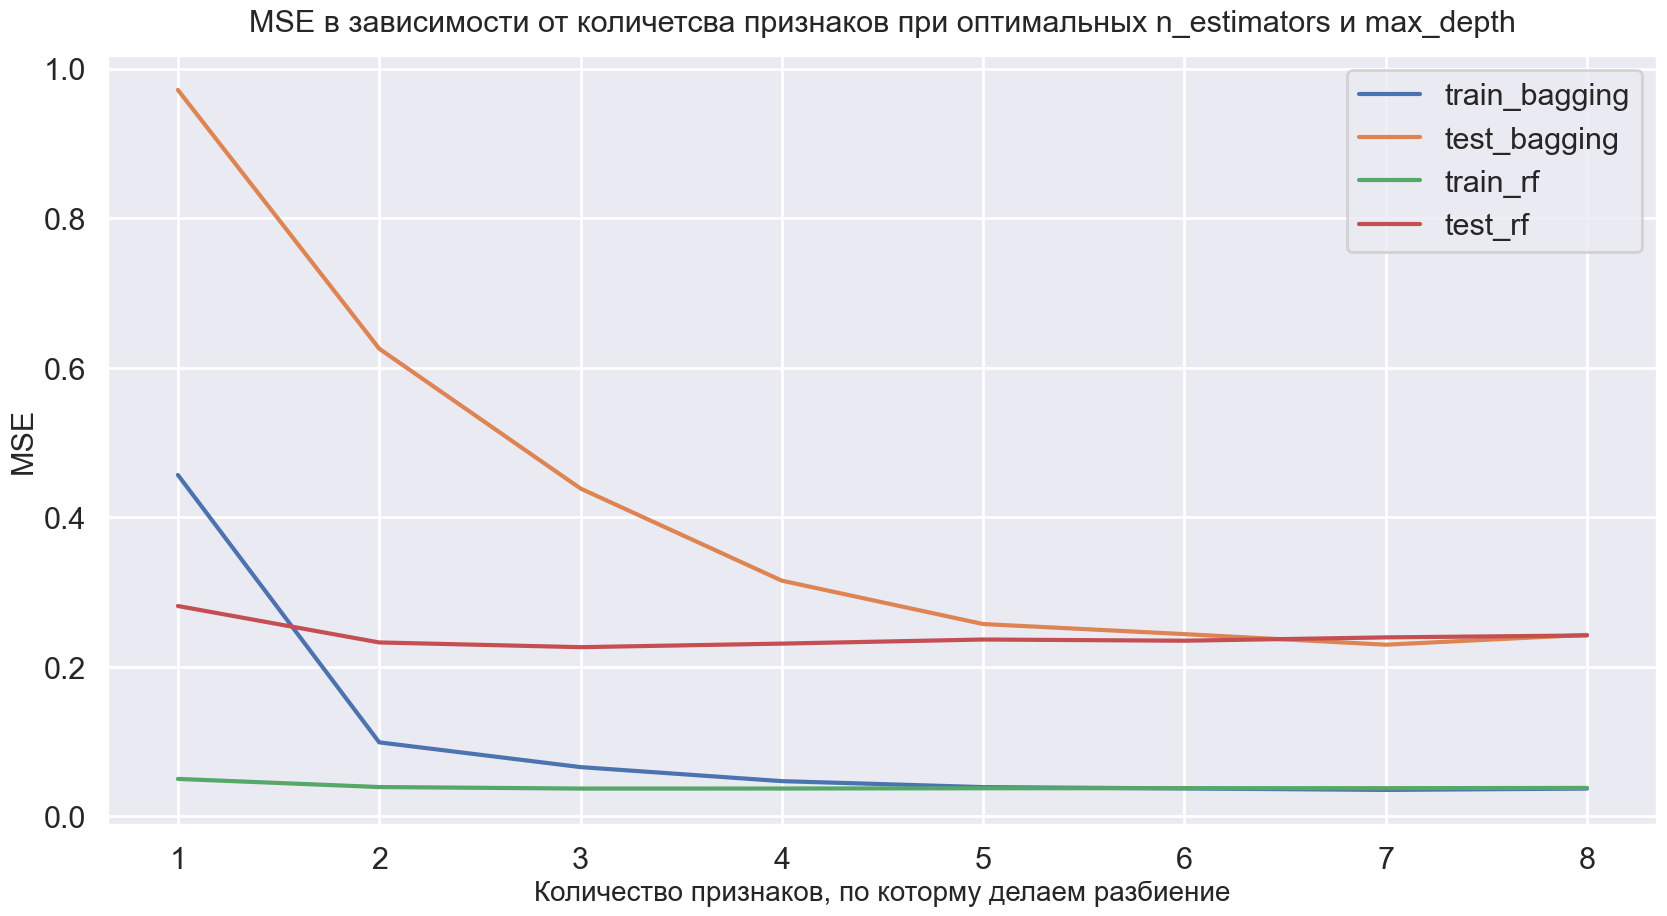

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(max_features, mse_values_train, label='train_bagging')
plt.plot(max_features, mse_values_test, label='test_bagging')
plt.plot(max_features, mse_values_train_rf, label='train_rf')
plt.plot(max_features, mse_values_test_rf, label='test_rf')
plt.legend()
plt.xlabel('Количество признаков, по которму делаем разбиение', fontsize=20)
plt.ylabel('MSE', fontsize=22)
plt.title('MSE в зависимости от количетсва признаков при оптимальных n_estimators и max_depth', 
          fontsize=22, y=1.02);

Сравните результаты обычного случайного леса с только что построенным лесом.

Сделайте выводы. Объясните, чем плох такой подход пострения случайного леса. Какое преимущество мы получаем, когда выбираем случайное подмножество признаков в каждой вершине в обычном случайном лесу? Опирайтесь в своих рассуждениях на bias-variance разложение.

В случае если мы заранее задаем признаки модель при малом количетсве признаков выдает довольно большую ошибку как на обучающих, так и на тестовых данных. Затем же ошибка уменьшается до примерно соответствующих значений в другой модели. Это может быть связано с тем, что при изначальном выборе признаков корреляция деревьвьев большая и соответственно дисперсия больше.

**Вывод.**

Мы нашли оптимальные значения гиперпараметров для случайного леса с помощью поиска по сетке. Пронаблюдали как меняется ошибка при увеличении количества деревьев и максимальной глубины: сначала быстро уменьшается, а после какого-то значения - медленно. Выяснили, что в отличии от обычного решающего дерева у нас не возникает переобучения леса при увелчении максимальной глубины деревьев. Также нашли оптимальное значение кооличетсва признаков, которое стоит рассматривать при построении деревьев: 3. И затем показали, что лучше использовать случайный лес, чем бэггинг модель при изначальном задании рассматриваемых признаков.

Поясните разницу между следующими конструкциями:

`BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_features=n_features)`

`BaggingRegressor(base_estimator=DecisionTreeRegressor(max_features=n_features))`

Первая модель фиксирует максимальное количество рассматриваемых признаков для всех деревьев изначально, а вторая модель фиксирует максимальное количество рассматриваемых признаков для каждого дерева отдельно.

## Задача 4

На лекции получена формула bias-variance разложения для беггинга. Проведите эксперимент, в котором выясните, насколько уменьшается разброс (variance-компонента) беггинг-модели на 100 базовых моделях по отношению к одной базовой модели. Используйте данные из предыдущей задачи. Рассмотрите беггинг на следующих базовых моделях:
* решающие деревья, можно использовать вариант случайного леса,
* ридж-регрессия.

Для решения задачи потребуется оценить корреляции предсказаний на тестовой выборке базовых моделей, входящих в состав беггинг-модели. Их можно получить с помощью поля `estimators_` у обученной беггинг-модели. Для оценки корреляций используйте [`scipy.stats.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) или [`numpy.corrcoef`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html).

Насколько уменьшается разброс в каждом случае? Для каждого случая постройте также матрицу корреляций предсказаний базовых моделей и гистограмму по ним.